In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression

from statsmodels.tsa.seasonal import seasonal_decompose
import sys
import folium

# Data Loading

In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
df_train.shape

(1460, 81)

The difference between the min and max values is way too large for some features, meaning these features have lots of outliers. 

In [4]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


# Feature Engineering

In [5]:
#43 categorical features and the rest are numerical features
df_train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [6]:
# Features with NaNs and the number of null for each feature
null_values = df_train.columns[df_train.isnull().any()]
null_features = df_train[null_values].isnull().sum().sort_values(ascending = False)
missing_data = pd.DataFrame({'No of Nulls' :null_features})
missing_data

,No of Nulls
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageType,81
GarageFinish,81
GarageQual,81


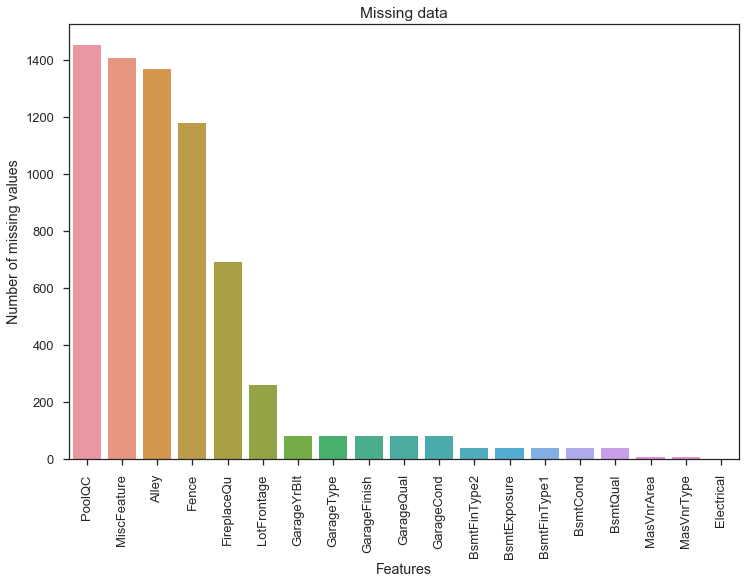

In [7]:
#plotting the features with missing values above

%matplotlib inline
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

plt.figure(figsize= (12, 8))
plt.xticks(rotation='90')
ax = plt.axes()
sns.barplot(null_features.index, null_features)
ax.set(xlabel = 'Features', ylabel = 'Number of missing values', title = 'Missing data');

## Imput missing values

### Defaulting to 0 
PoolQc data description says NA means "No Pool". Which is common for homes to not have pools so we replace with 0. Same for Alley, Fences, fireplaceQu, Misc, etc...

In [8]:
missing_data = ['PoolQC',"MiscFeature","Alley", "Fence", "FireplaceQu", 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
                  'GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 
                  'BsmtHalfBath', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', "MasVnrType", "MasVnrArea",
                  'MSSubClass']

for x in missing_data:
    df_train[x] = df_train[x].fillna(0)

In [9]:
# Features with NaNs and the number of null for each features
null_values = df_train.columns[df_train.isnull().any()]
null_features = df_train[null_values].isnull().sum().sort_values(ascending = False)
missing_data = pd.DataFrame({'No of Nulls' :null_features})
missing_data

,No of Nulls
LotFrontage,259
Electrical,1


### LotFrontage

LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.

In [10]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
df_train["LotFrontage"] = df_train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

### Electrical

In [11]:
#fill missing value for Electrical column with the mode
df_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])

In [12]:
# Features with NaNs and the number of null for each features
null_values = df_train.columns[df_train.isnull().any()]
null_features = df_train[null_values].isnull().sum().sort_values(ascending = False)
missing_data = pd.DataFrame({'No of Nulls' :null_features})
missing_data

,No of Nulls


## Encode categorical features to numerical

In [13]:
#create dummy variables for the categorical features via pd.get_dummies
df_train_dummies = pd.get_dummies(df_train)

In [14]:
df_train_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 305 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(35), uint8(267)
memory usage: 814.2 KB


In [15]:
df_train_dummies.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1460.0,70.199658,22.431902,21.0,60.00,70.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1460.0,103.117123,180.731373,0.0,0.00,0.0,164.25,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


# Analysis

## Numerical feature correlation

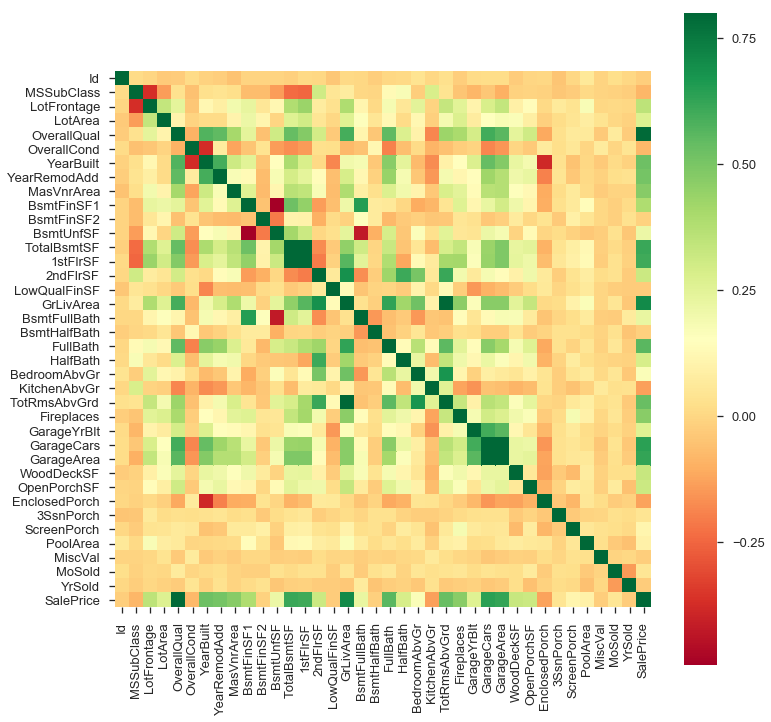

In [16]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrmat, vmax=.8, square=True, cmap="RdYlGn");


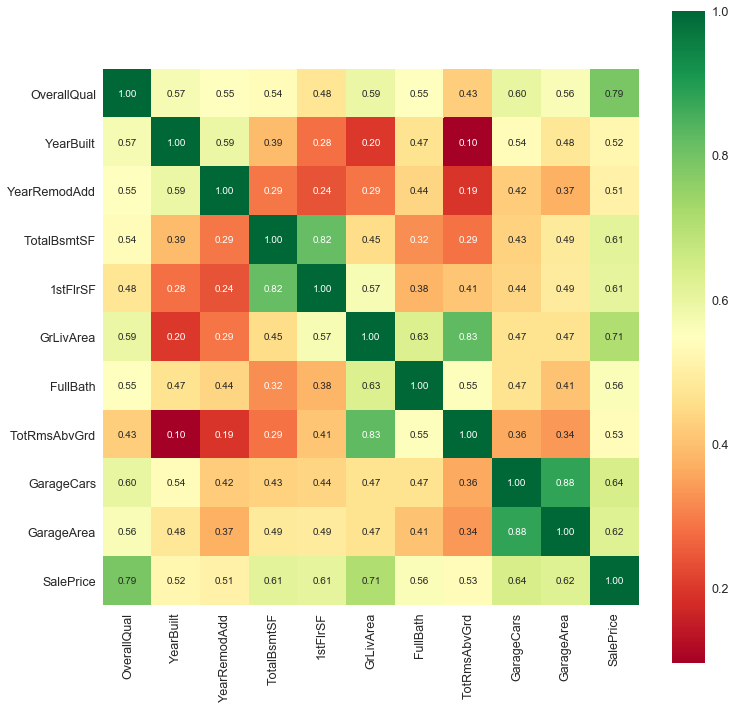

In [17]:
# Zoom in on saleprice
k = 25 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
cm = df_train[top_corr_features].corr() 
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 cmap="RdYlGn")
plt.gcf().set_size_inches(12,12)
plt.show()

In [18]:
# Correlation between the features and the predictor- SalePrice
# include categorical values!
# no differences to above
predictor = df_train_dummies['SalePrice']
fields = [x for x in df_train_dummies.columns if x != 'SalePrice']
correlations = df_train_dummies[fields].corrwith(predictor)
correlations = correlations.sort_values(ascending = False)
# correlations
corrs = (correlations
            .to_frame()
            .reset_index()
            .rename(columns={'level_0':'feature1',
                                0:'Correlations'}))
corrs

,index,Correlations
0,OverallQual,0.790982
1,GrLivArea,0.708624
2,GarageCars,0.640409
3,GarageArea,0.623431
4,TotalBsmtSF,0.613581
5,1stFlrSF,0.605852
6,FullBath,0.560664
7,BsmtQual_Ex,0.553105
8,TotRmsAbvGrd,0.533723
9,YearBuilt,0.522897


### Scatterplots

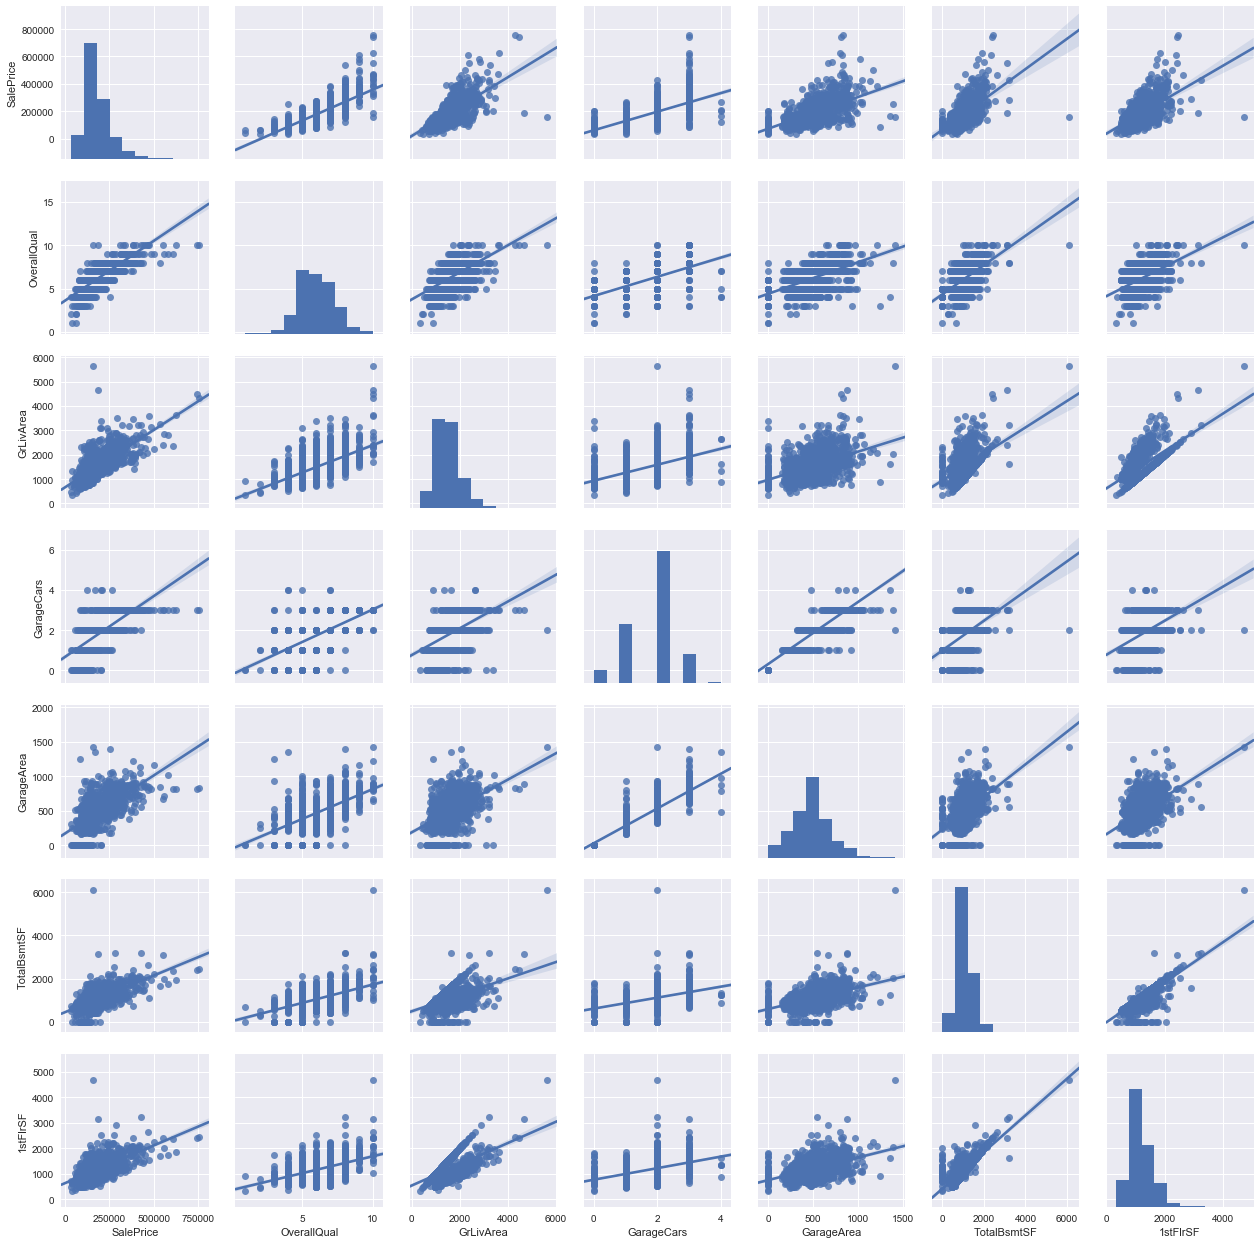

In [19]:
#scatterplot for the highest correlated variables to SalePrice
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']
sns.pairplot(df_train[cols], size = 2.5, kind="reg")
plt.show();

#these variables are shown to have positive correlation to SalePrice

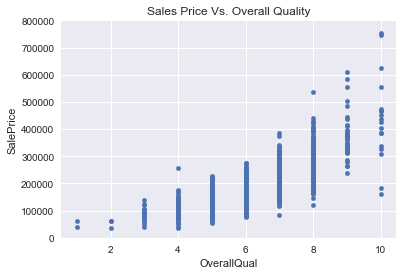

In [20]:
#bivariate analysis saleprice/grlivarea
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), title='Sales Price Vs. Overall Quality');

#overall qual is positively correlated with saleprice

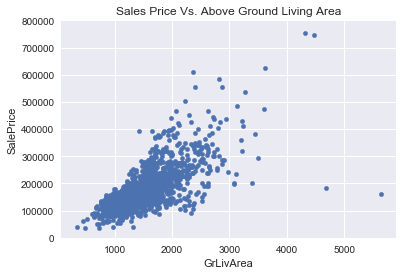

In [21]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), title='Sales Price Vs. Above Ground Living Area');

#GrLivArea is positively correlated with SalePrice

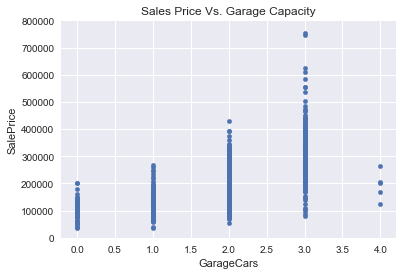

In [22]:
#bivariate analysis saleprice/garagecars
var = 'GarageCars'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), title='Sales Price Vs. Garage Capacity');

#GarageCars is postively correlated to SalePrice up to 2-3 cars

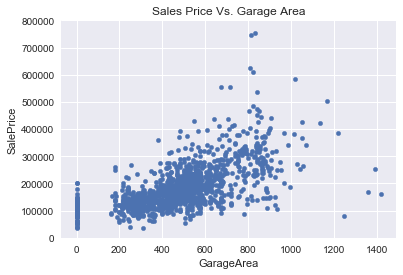

In [23]:
#bivariate analysis saleprice/garagearea
var = 'GarageArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), title='Sales Price Vs. Garage Area');

#GarageArea is also generally positively correlated with SalePrice

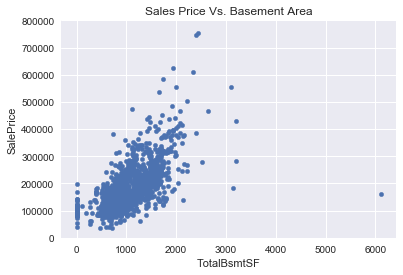

In [24]:
#bivariate analysis saleprice/TotalBsmtSF
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), title='Sales Price Vs. Basement Area');

#TotalBsmtSF is generally positively correlated with SalePrice

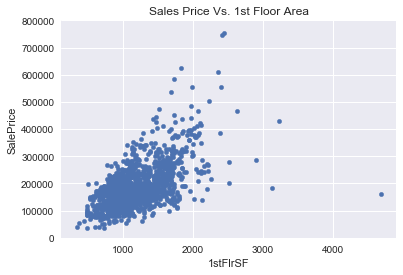

In [25]:
#bivariate analysis saleprice/1stFlrSF
var = '1stFlrSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000),title='Sales Price Vs. 1st Floor Area');

#1stFlrSF is positively correlated with SalePrice

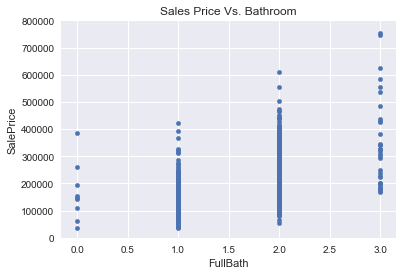

In [26]:
#bivariate analysis saleprice/fullbath
var = 'FullBath'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), title='Sales Price Vs. Bathroom');

#FullBath is positively correlated to SalePrice

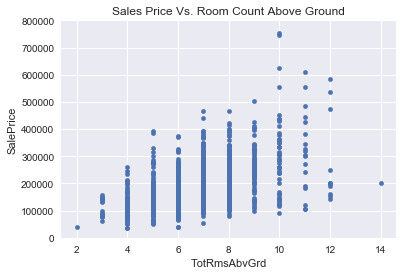

In [27]:
#bivariate analysis saleprice/TotRmsAbvGrd
var = 'TotRmsAbvGrd'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), title='Sales Price Vs. Room Count Above Ground');

#number of rooms above ground is positively correlated to SalePrice

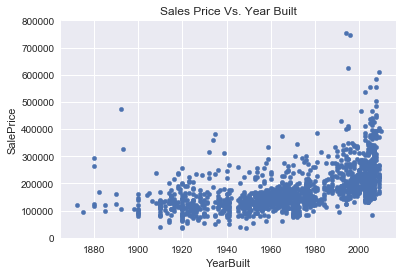

In [28]:
#bivariate analysis saleprice/YearBuilt
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), title='Sales Price Vs. Year Built');

#Recently built homes is generally worth more than the older homes

## Other features

### 5-yr Average Sales Price by Neighborhood

In [29]:
# Derive the overall Neighborhood mean for all 5 years
df_neighborhood_avg = df_train.groupby('Neighborhood')[['SalePrice']].mean()
df_neighborhood_avg

,SalePrice
Neighborhood,
Blmngtn,194870.882353
Blueste,137500.000000
BrDale,104493.750000
BrkSide,124834.051724
ClearCr,212565.428571
CollgCr,197965.773333
Crawfor,210624.725490
Edwards,128219.700000
Gilbert,192854.506329


### Yearly Average Sales Price by Neighborhood

In [30]:
# Derive the yearly Neighborhood mean
df_N_B_YR = df_train.groupby(['Neighborhood','YrSold'])['SalePrice'].aggregate('mean').unstack().T
df_N_B_YR = df_N_B_YR.replace(np.nan,0)
df_N_B_YR.T

YrSold,2006,2007,2008,2009,2010
Neighborhood,,,,,
Blmngtn,217087.000000,183350.500000,175447.500000,176720.000000,192000.000000
Blueste,0.000000,0.000000,151000.000000,124000.000000,0.000000
BrDale,96750.000000,113833.333333,95225.000000,118625.000000,88000.000000
BrkSide,112746.666667,135737.500000,121707.142857,134994.117647,96500.000000
ClearCr,199166.666667,236333.333333,208991.500000,169875.000000,246850.000000
CollgCr,199016.406250,213999.933333,187718.055556,192317.769231,203700.000000
Crawfor,196635.181818,198777.578947,254411.111111,180211.111111,296833.333333
Edwards,134403.684211,132588.235294,132473.076923,123855.555556,111445.454545
Gilbert,200250.625000,181967.947368,186000.000000,199955.000000,185500.000000


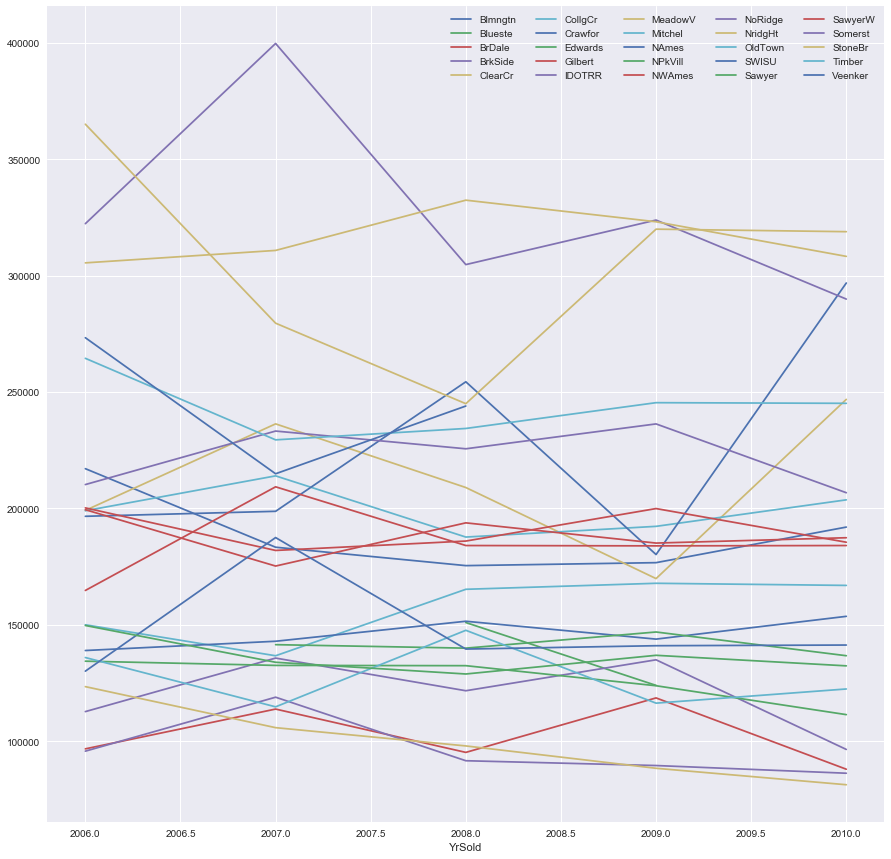

In [31]:
# plot above, this is hard to read!
fig, ax = plt.subplots(figsize=(15,15))

#df_train.groupby(['YrSold', 'Neighborhood'])['SalePrice'].aggregate('mean').unstack().plot.bar(ax=ax)
df_train.groupby(['YrSold', 'Neighborhood'])['SalePrice'].aggregate('mean').unstack().plot(ax=ax)
legend = plt.legend(ncol=5)

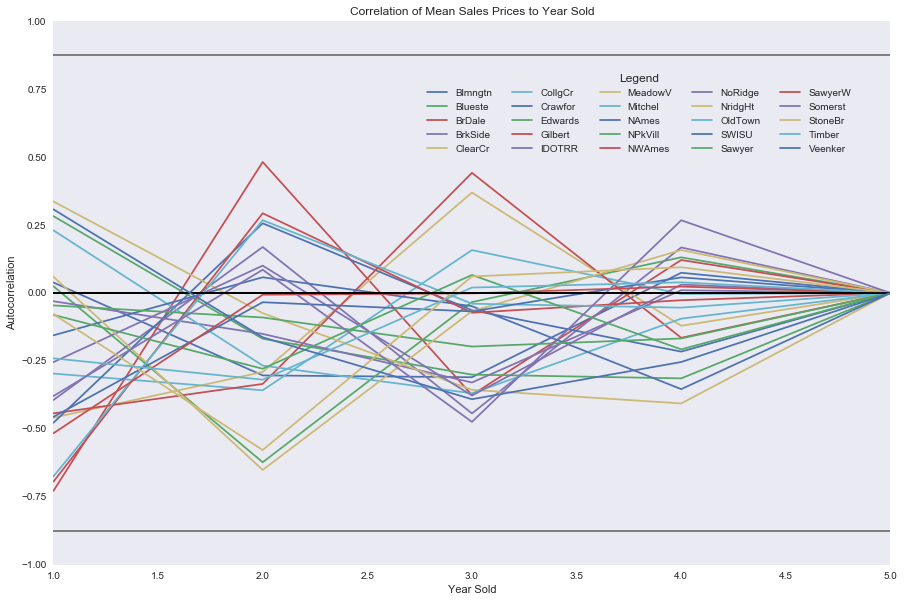

In [32]:
import datetime
from pandas.plotting import autocorrelation_plot
# plot yearly mean $ autocorrelations 

plt.figure(figsize=(15,10))
for x in range(0, len(df_N_B_YR.columns)):
    autocorrelation_plot(df_N_B_YR.iloc[:, x], label=df_N_B_YR.columns[x]) 

plt.legend(title='Legend',loc='upper center', bbox_to_anchor=(0.70, .92),
          ncol=5, fancybox=True, shadow=True)
plt.title('Correlation of Mean Sales Prices to Year Sold')
plt.xlabel('Year Sold')
plt.show()

### Average Sales Price by Year

Text(0.5,0,'Year Sold')

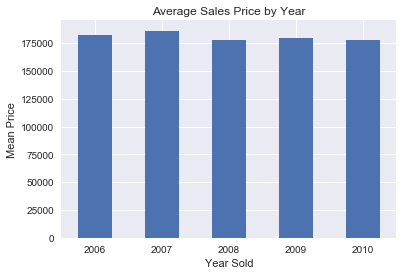

In [33]:
# But, the yearly average price doesn't look affected by the 2008 financial crisis!
df_YrSold_SalePrice = df_train.groupby('YrSold')['SalePrice'].agg(['mean'])
df_YrSold_SalePrice.plot(kind='bar', stacked=True, rot = 0, legend=False, title='Average Sales Price by Year');
plt.ylabel('Mean Price')
plt.xlabel('Year Sold')

### Seasonality - 2010 Is a partial year 

Text(0.5,1,'Houses Sold in each month')

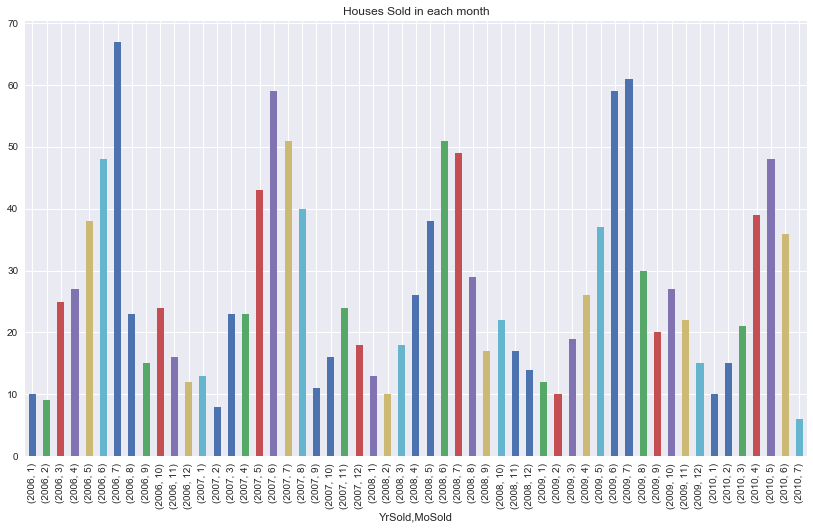

In [34]:
#count the number of houses sold in each month in each year
# we don't have a full year of data for 2010!!! but the trends show worse year than 2009
seasonality_df = df_train.groupby(['YrSold','MoSold']).Id.count()
seasonality_df.plot(kind='bar', figsize = (14,8))
plt.title('Houses Sold in each month')

## Looking at Seasonality by Quarterly Basis

In [35]:
#convert MoSold column as float as it was originally a string
df_train.MoSold= df_train.MoSold.astype(float)

#create quarter definition
def quarter(a):
    if a <=3:
        return 'Q1'
    elif a>3 and a<=6:
        return 'Q2'
    elif a>6 and a<=9:
        return 'Q3'
    else:
        return 'Q4'

df_train['Quarter'] = df_train['MoSold'].map(quarter)

Text(0.5,1,'Houses Sold by Quarter')

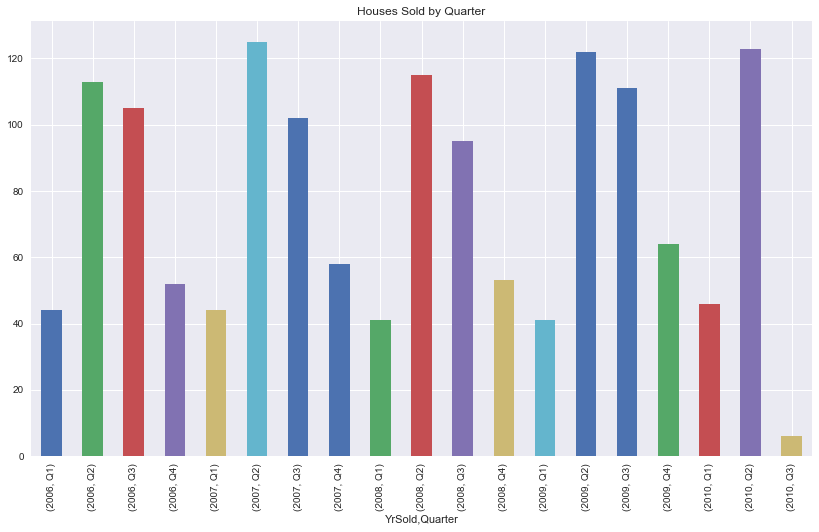

In [36]:
#count the number of houses sold in each quarter
#seasonality trend is also confirmed, where volume of houses sold occurs in Q2 and Q3, which are spring/summer months
seasonalityquarterly_df = df_train.groupby(['YrSold','Quarter']).Id.count()
seasonalityquarterly_df.head()

seasonalityquarterly_df.plot(kind='bar', figsize = (14,8))
plt.title('Houses Sold by Quarter')

### Neighborhood Volume of Transactions by Year

In [37]:
#creating a cross table with number of units sold in each neighborhood and by year
sales_by_area = pd.crosstab(index = df_train["YrSold"], columns=[df_train["Neighborhood"]])
sales_by_area.T

YrSold,2006,2007,2008,2009,2010
Neighborhood,,,,,
Blmngtn,7,2,2,5,1
Blueste,0,0,1,1,0
BrDale,4,3,4,4,1
BrkSide,15,10,14,17,2
ClearCr,6,6,8,4,4
CollgCr,32,30,36,39,13
Crawfor,11,19,9,9,3
Edwards,19,17,26,27,11
Gilbert,24,19,10,20,6


Text(0.5,1,'Sold Properperties 2006-2010')

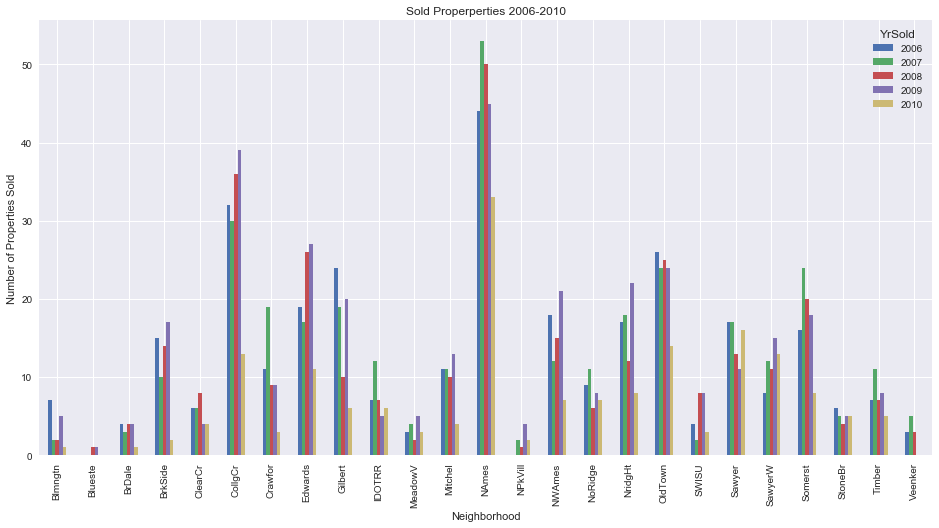

In [38]:
#plotting the above table
ax = sales_by_area.T.plot(kind='bar', stacked=False, rot = 0, figsize= (16, 8));
plt.xticks(rotation='90')
plt.ylabel('Number of Properties Sold')
plt.title('Sold Properperties 2006-2010')

There is a decline in transactions, tappering downward in 2010 (even though this is a partial year) 

### Year Built 

Text(0.5,1,'Year Built Histogram')

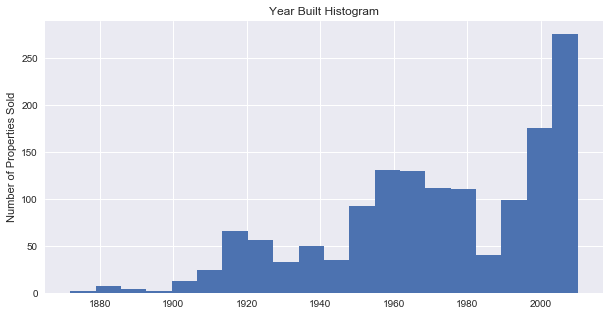

In [39]:
# this histogram tell us the histogram is not normally distributed
df_train.YearBuilt.hist(bins=20, figsize=(10, 5))
plt.ylabel('Number of Properties Sold')
plt.title('Year Built Histogram')

In [40]:
# We will create the following bins:

bins = [0,1900,1920,1940,1960,1980,2000,2011]
bin_labels = ['0-1899','1900-1919', '1920-1939', '1940-1959', '1960-1979', '1980-1999', '>2000']

# We will create a new attribute YrSold_Group:
df_train['YrBuilt_Group'] = pd.cut(df_train.YearBuilt, bins, right=False, labels = bin_labels)

# Checking how many sales were classified into each group:
df_train.YrBuilt_Group.value_counts().sort_index()

0-1899        15
1900-1919     73
1920-1939    151
1940-1959    246
1960-1979    363
1980-1999    224
>2000        388
Name: YrBuilt_Group, dtype: int64

In [41]:
# This will return the count and mean for the group 
# this analysis indicates for any group, the mean year sold was 2007 with exception to the 15 houses build prior to 1900
YearBuilt_analysis = df_train.groupby('YrBuilt_Group')['YrSold'].agg(['mean']).reset_index()
YearBuilt_analysis

,YrBuilt_Group,mean
0,0-1899,2008.133333
1,1900-1919,2007.698630
2,1920-1939,2007.735099
3,1940-1959,2007.906504
4,1960-1979,2007.870523
5,1980-1999,2007.861607
6,>2000,2007.721649


Text(0.5,1,'Neighborhoods Prevalant for the Build Years Prior to 1900')

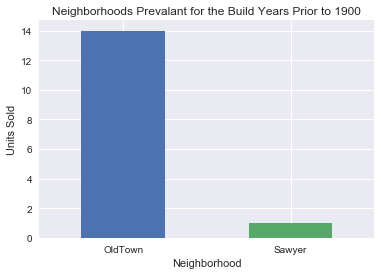

In [42]:
#plot number of houses sold that were built before 1900s, which results in homes in OldTown and Sawyer
df_train.groupby(df_train.Neighborhood[df_train['YrBuilt_Group'] == '0-1899']).Id.count().plot(kind='bar', stacked=True, rot = 0);
plt.ylabel('Units Sold')
plt.title('Neighborhoods Prevalant for the Build Years Prior to 1900')

Here we see OldTown became popular 

### New Housing Peak

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

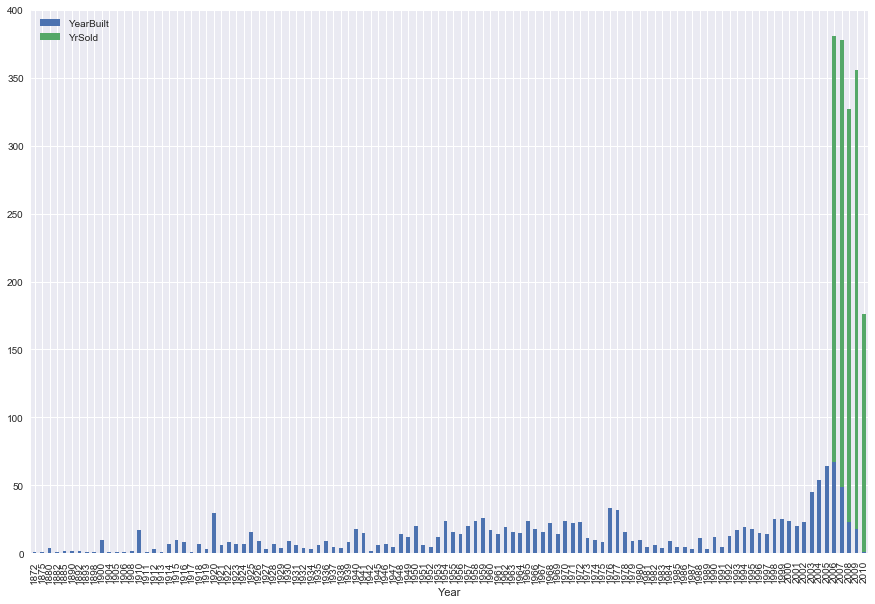

In [43]:
# here we see new housing build peaked in 2006
year_built_count = df_train['YearBuilt'].value_counts().sort_values(axis=0)
df_year_built = pd.DataFrame(year_built_count)
df_year_built.index.name = 'Year'
df_year_built

year_sold_count = df_train['YrSold'].value_counts().sort_values(axis=0)
df_year_sold = pd.DataFrame(year_sold_count)
df_year_sold.index.name = 'Year'
df_year_sold

df_year_built_sold = df_year_built
df_year_built_sold = df_year_built_sold.merge(
    df_year_sold, 
    left_on='Year', 
    right_on='Year', 
    how='outer')

df_year_built_sold = df_year_built_sold.sort_values(by='Year')
df_year_built_sold.fillna(0,inplace=True)
df_year_built_sold

df_year_built_sold.plot(kind='bar', stacked=True, rot = 0, figsize=(15, 10));
plt.xticks(rotation='90')

### Year Remodel Added

Text(0.5,1,'Year Remodelling Added Histogram')

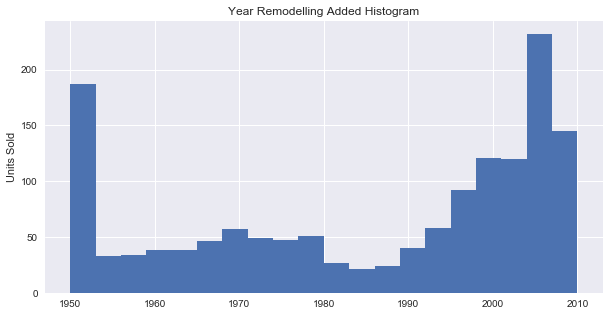

In [44]:
# this histogram tell us the histogram is not normally distributed
df_train.YearRemodAdd.hist(bins=20, figsize=(10, 5))

plt.ylabel('Units Sold')
plt.title('Year Remodelling Added Histogram')

In [45]:
# Create a new attribute YearRemodAdd_Group:
df_train['YearRemodAdd_Group'] = pd.cut(df_train.YearRemodAdd, bins, right=False, labels = bin_labels)

# Checking how many sales were classified into each group:
df_train.YearRemodAdd_Group.value_counts().sort_index()

0-1899         0
1900-1919      0
1920-1939      0
1940-1959    272
1960-1979    308
1980-1999    328
>2000        552
Name: YearRemodAdd_Group, dtype: int64

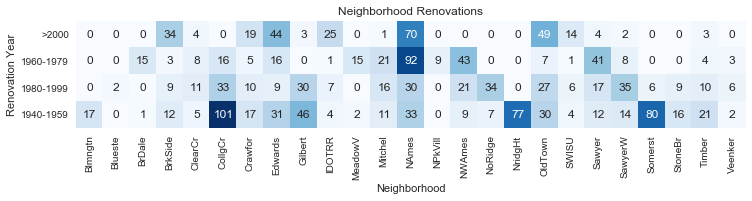

In [46]:
# Let's see which Neighborhoods went through a renovation and if it paid off!
RemodAdd_analysis = (pd.crosstab(df_train['YearRemodAdd_Group'],df_train['Neighborhood'], normalize='columns')*100)
(RemodAdd_analysis).round(2)

plt.figure(figsize=(12, 8))
ax = plt.axes()
sns.heatmap(pd.crosstab(df_train['YearRemodAdd_Group'],df_train['Neighborhood']),
            cmap="Blues", annot=True, fmt='.3g', cbar=False, linewidths=0, square=True, ax=ax)
ax.set_title('Neighborhood Renovations')
ax.set_ylabel('Renovation Year')
plt.show()

The 3 most active **`neighbourhoods`** from the oldest grouping (College Creek, Northridge Heights, Somerset) had  AVG Sale Prices above the mean!!!



### Price per Square Foot

Text(0.5,1,'Sale Price Histogram')

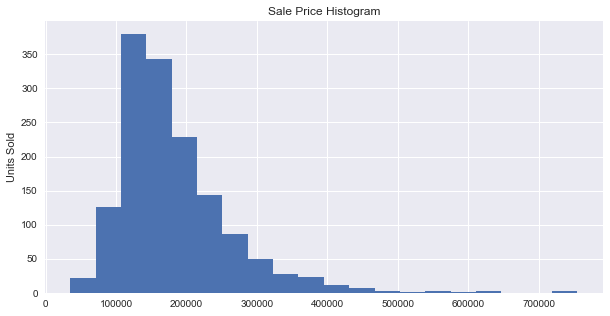

In [47]:
# what about sale price? definetly not normally distributed
df_train.SalePrice.hist(bins=20, figsize=(10, 5))
plt.ylabel('Units Sold')
plt.title('Sale Price Histogram')

Text(0.5,1,'Ground Floor Living Area Histogram')

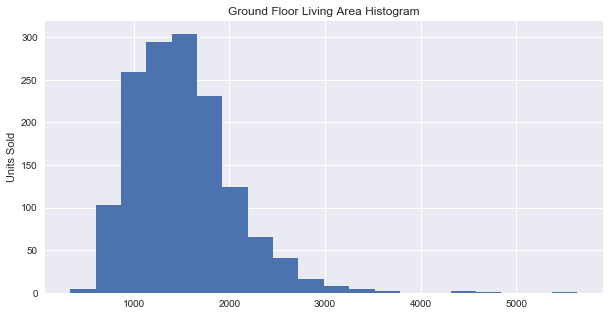

In [48]:
# what about SF? Also not normally distributed!
df_train.GrLivArea.hist(bins=20, figsize=(10, 5))
plt.ylabel('Units Sold')
plt.title('Ground Floor Living Area Histogram')

Text(0.5,1,'Price per SF Histogram')

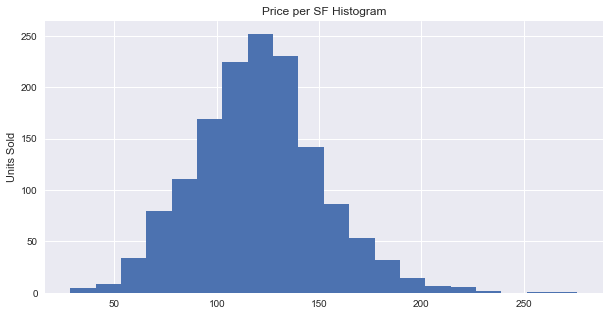

In [49]:
# compute new feature on a Price/SF basis
# this looks a bit more normally distributed
df_train['Price_SF'] = df_train.SalePrice / df_train.GrLivArea

df_train.Price_SF.hist(bins=20, figsize=(10, 5))
plt.ylabel('Units Sold')
plt.title('Price per SF Histogram')

In [50]:
# We will create the following bins:

bins2 = [0,50,100,150,200,250,500]
bin2_labels = ['0-50','51-100', '101-150', '151-200', '201-250', '>251']

# We will create a new attribute YrSold_Group:
df_train['Price_SF_Group'] = pd.cut(df_train.Price_SF, bins2, right=False, labels = bin2_labels)

# Checking how many sales were classified into each group:
df_train.Price_SF_Group.value_counts().sort_index()

0-50        11
51-100     355
101-150    867
151-200    208
201-250     17
>251         2
Name: Price_SF_Group, dtype: int64

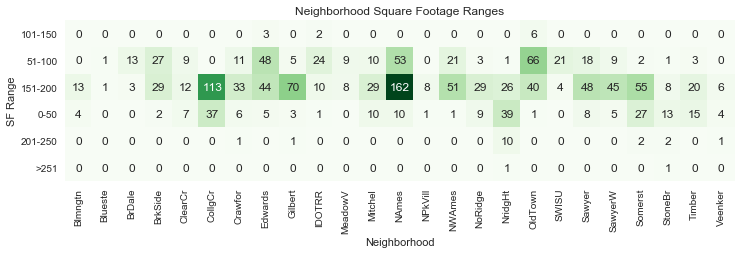

In [51]:
# This heatmap reveals only 2 Neighborhoods had premium Price/SF 
# Northridge Heights and Stonebrook
Price_SF_Group_analysis = pd.crosstab(df_train['Price_SF_Group'],
                                      df_train['Neighborhood'])
Price_SF_Group_analysis=(Price_SF_Group_analysis).round(0)
Price_SF_Group_analysis
plt.figure(figsize=(12, 8))
ax = plt.axes()
sns.heatmap(pd.crosstab(df_train['Price_SF_Group'],df_train['Neighborhood']),
            cmap="Greens", annot=True, fmt='.3g', cbar=False, linewidths=0, square=True, ax=ax)
ax.set_title('Neighborhood Square Footage Ranges')
ax.set_ylabel('SF Range')
plt.show()

### Most expensive SF

Text(0.5,0,'Neighborhood')

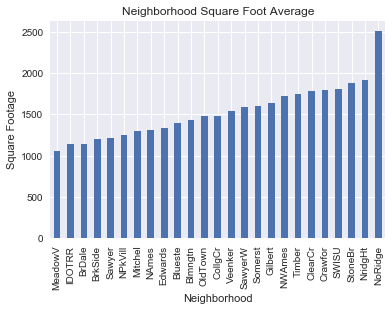

In [52]:
# Interestingly enough, Northridge (neighbor to Northridge Heights) and a lower Price/SF, but
# mean price is similar to Northridge Hieghts - this might suggest a large number of SF ??

df_Neighborhood_GrLivArea_mean = df_train.groupby('Neighborhood')['GrLivArea'].agg(['mean']).reset_index()
df_Neighborhood_GrLivArea_mean = df_Neighborhood_GrLivArea_mean.sort_values(by=['mean'])
df_Neighborhood_GrLivArea_mean.set_index('Neighborhood',inplace =True)
ax = plt.axes()
df_Neighborhood_GrLivArea_mean.plot(ax=ax,
                                    kind='bar', 
                                    stacked=True, 
                                    rot = 90, 
                                    title='Neighborhood Square Foot Average', 
                                    legend=False);
ax.set_ylabel('Square Footage')
ax.set_xlabel('Neighborhood')

### Overall Condition

In [53]:
#creating a cross table and count how many units are sold by overallcond in each year
OverallCond_YrSold = pd.crosstab(df_train['OverallCond'],df_train['YrSold'])
OverallCond_YrSold

YrSold,2006,2007,2008,2009,2010
OverallCond,,,,,
1,0,0,0,1,0
2,1,1,0,1,2
3,5,4,3,11,2
4,20,9,7,15,6
5,192,189,160,186,94
6,44,58,59,63,28
7,37,52,49,35,32
8,13,14,17,19,9
9,2,2,9,7,2


In [54]:
#table = pivot_table(df_train, values='SalePrice', index=['YrSold', 'OverallCond'], columns=['Neighborhood'], aggfunc=np.sum)

Text(0,0.5,'Sales')

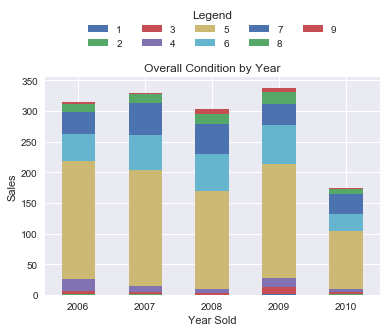

In [55]:
#plot the above table for visual analysis

OverallCond_YrSold.T.plot(kind='bar', stacked=True, rot = 0);
plt.legend(title='Legend',loc='upper center', bbox_to_anchor=(0.5, 1.35),
          ncol=5, fancybox=True, shadow=True)
plt.title('Overall Condition by Year')
plt.xlabel('Year Sold')
plt.ylabel('Sales')

In [56]:
#creating a cross table and count how many units are sold by overallcond in each year by percentage terms
#majority of houses sold generally have overallcoond around 5
OverallCond_YrSold_per = pd.crosstab(df_train['OverallCond'],df_train['YrSold'], normalize='columns')*100
(OverallCond_YrSold_per).round(2)

YrSold,2006,2007,2008,2009,2010
OverallCond,,,,,
1,0.00,0.00,0.00,0.30,0.00
2,0.32,0.30,0.00,0.30,1.14
3,1.59,1.22,0.99,3.25,1.14
4,6.37,2.74,2.30,4.44,3.43
5,61.15,57.45,52.63,55.03,53.71
6,14.01,17.63,19.41,18.64,16.00
7,11.78,15.81,16.12,10.36,18.29
8,4.14,4.26,5.59,5.62,5.14
9,0.64,0.61,2.96,2.07,1.14


Text(0,0.5,'Percentage')

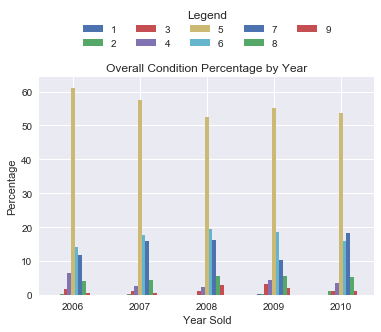

In [57]:
# Let's quickly plot the table above to better see the data

OverallCond_YrSold_per.T.plot(kind='bar', stacked=False, rot=0);
plt.legend(title='Legend',loc='upper center', bbox_to_anchor=(0.5, 1.35),
          ncol=5, fancybox=True, shadow=True)
plt.title('Overall Condition Percentage by Year')
plt.xlabel('Year Sold')
plt.ylabel('Percentage')

### Sale Condition

In [58]:
#creating a cross table and count how many units are sold by salecondition in each year by percentage terms
#majority of houses sold generally have a normal salecondition
SaleCondition_YrSold_per = pd.crosstab(df_train['SaleCondition'],df_train['YrSold'], normalize='columns')*100
(SaleCondition_YrSold_per).round(2)

YrSold,2006,2007,2008,2009,2010
SaleCondition,,,,,
Abnorml,10.51,3.95,6.91,6.80,6.29
AdjLand,0.64,0.30,0.33,0.00,0.00
Alloca,0.32,0.91,0.66,1.48,0.57
Family,2.55,2.13,0.00,0.89,1.14
Normal,72.29,80.55,86.84,85.21,88.00
Partial,13.69,12.16,5.26,5.62,4.00


Text(0,0.5,'Sales')

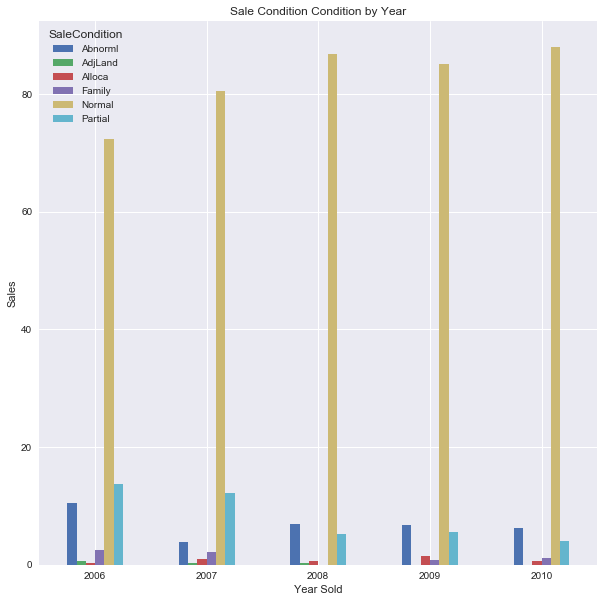

In [59]:
#plotting the above crosstable for visual analysis

SaleCondition_YrSold_per.T.plot(kind='bar', stacked=False, rot=0, figsize=(10, 10));
#plt.legend(title='Legend',loc='upper center', bbox_to_anchor=(0.5, 1.35),
#          ncol=5, fancybox=True, shadow=True)
plt.title('Sale Condition Condition by Year')
plt.xlabel('Year Sold')
plt.ylabel('Sales')

### Zoning

In [60]:
# analyzing number of houses sold by MSZoning by year in percentage terms
#majority of sales occur in the RL zone
MSZoning_Neighborhood_per = pd.crosstab(df_train['MSZoning'],df_train['Neighborhood'], normalize='columns')*100
df_MSZoning_Neighborhood_per = (MSZoning_Neighborhood_per).T.round(2)
df_MSZoning_Neighborhood_per['Primary_Zone']='TBD'
df_MSZoning_Neighborhood_per.reset_index('Neighborhood')
for xx in range(0,len(df_MSZoning_Neighborhood_per)):
    if df_MSZoning_Neighborhood_per.iloc[xx]['C (all)'] > 50:
        df_MSZoning_Neighborhood_per.iloc[xx, df_MSZoning_Neighborhood_per.columns.get_loc('Primary_Zone')] = 'Low'
    elif df_MSZoning_Neighborhood_per.iloc[xx]['FV'] > 50:
        df_MSZoning_Neighborhood_per.iloc[xx, df_MSZoning_Neighborhood_per.columns.get_loc('Primary_Zone')] = 'Low'
    elif df_MSZoning_Neighborhood_per.iloc[xx]['RH'] > 50:
        df_MSZoning_Neighborhood_per.iloc[xx, df_MSZoning_Neighborhood_per.columns.get_loc('Primary_Zone')] = 'High'
    elif df_MSZoning_Neighborhood_per.iloc[xx]['RL'] > 50:
        df_MSZoning_Neighborhood_per.iloc[xx, df_MSZoning_Neighborhood_per.columns.get_loc('Primary_Zone')] = 'Low'
    elif df_MSZoning_Neighborhood_per.iloc[xx]['RM'] > 50:
        df_MSZoning_Neighborhood_per.iloc[xx, df_MSZoning_Neighborhood_per.columns.get_loc('Primary_Zone')] = 'Med'
df_MSZoning_Neighborhood_per

MSZoning,C (all),FV,RH,RL,RM,Primary_Zone
Neighborhood,,,,,,
Blmngtn,0.00,0.00,0.00,94.12,5.88,Low
Blueste,0.00,0.00,0.00,0.00,100.00,Med
BrDale,0.00,0.00,0.00,0.00,100.00,Med
BrkSide,0.00,0.00,0.00,48.28,51.72,Med
ClearCr,0.00,0.00,0.00,100.00,0.00,Low
CollgCr,0.00,0.00,0.00,93.33,6.67,Low
Crawfor,0.00,0.00,3.92,90.20,5.88,Low
Edwards,0.00,0.00,2.00,90.00,8.00,Low
Gilbert,0.00,0.00,0.00,100.00,0.00,Low


In [61]:
np.arange(0, 10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [62]:
#analyzing number of houses sold by MSZoning by year in percentage terms
#majority of sales occur in the RL zone
MSZoning_YrSold_per = pd.crosstab(df_train['MSZoning'],df_train['YrSold'], normalize='columns')*100
(MSZoning_YrSold_per).round(2)

YrSold,2006,2007,2008,2009,2010
MSZoning,,,,,
C (all),0.64,0.30,0.66,0.59,1.71
FV,4.14,4.56,4.61,4.44,4.57
RH,0.96,1.82,0.99,1.18,0.00
RL,78.34,79.64,76.32,79.88,80.57
RM,15.92,13.68,17.43,13.91,13.14


Text(0,0.5,'Percentage')

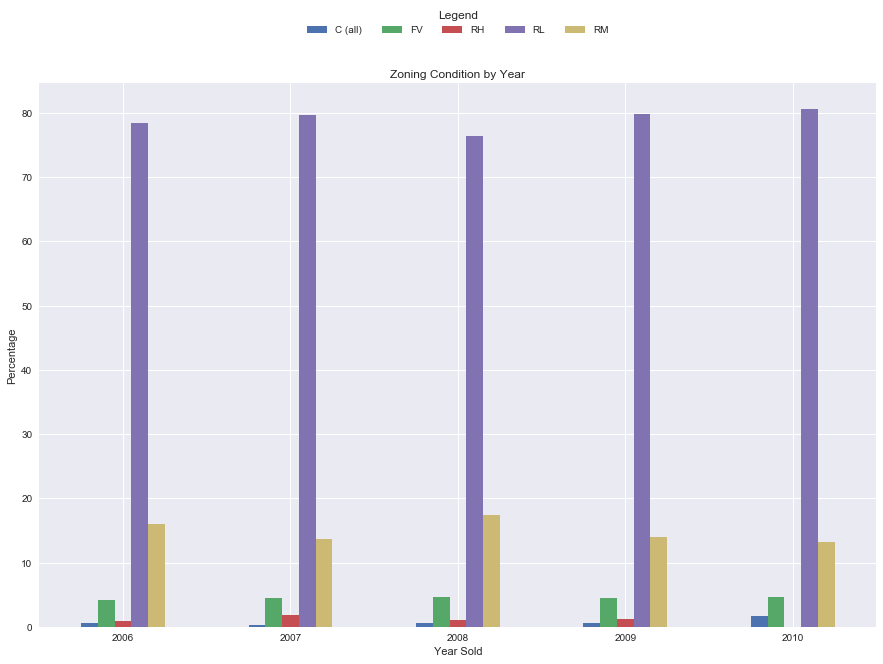

In [63]:
#plotting the above table for visual analysis
MSZoning_YrSold_per.T.plot(kind='bar', stacked=False, rot=0, figsize=(15, 10));
plt.legend(title='Legend',loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=True)
plt.title('Zoning Condition by Year')
plt.xlabel('Year Sold')
plt.ylabel('Percentage')

In [64]:
#analyzing average saleprice by MSZoning and by year
#No houses were sold in RH in 2010 thus NaN
#FV - Floating Village has the highest average SalePrice across all MSZoning by year
#RL - Residential Low Density comes in 2nd with average SalePrice - indicates population of Iowa prefer to live in suburbs?
MSZoning_YrSold_SalePrice = pd.crosstab(index = df_train['MSZoning'], 
                                        columns = df_train['YrSold'], 
                                        values = df_train['SalePrice'], aggfunc = np.mean)
(MSZoning_YrSold_SalePrice).round(2)


YrSold,2006,2007,2008,2009,2010
MSZoning,,,,,
C (all),71655.50,133900.00,60500.00,59950.00,75723.00
FV,186100.15,218256.80,221048.57,231265.33,206762.50
RH,128966.67,141000.00,150333.33,105258.50,NaN
RL,194904.06,196618.15,183933.69,189404.29,188472.51
RM,128492.38,121046.02,142988.68,116999.55,112521.74


In [65]:
#analyzing average saleprice by MSZoning and by month
#general saleprice premium observed in July and August relative to other month
#NaNs indicate no observed sales in month in each MSZoning
#FV has highest monthly average SalePrice across all MSZoning
#RL as above, 2nd highest monthly average SalePrice indicates population has preference to live in suburbs?
MSZoning_MoSold_SalePrice = pd.crosstab(index = df_train['MSZoning'], 
                                        columns = df_train['MoSold'],
                                        values = df_train['SalePrice'], aggfunc = np.mean)
(MSZoning_MoSold_SalePrice).round(2)


MoSold,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
MSZoning,,,,,,,,,,,,
C (all),102776.00,NaN,NaN,68400.00,NaN,55993.00,40000.00,81000.00,108000.00,60155.50,84400.00,NaN
FV,272450.00,186350.00,170600.00,225412.75,217116.25,187338.07,219155.60,223000.25,218878.00,265626.00,212300.00,263858.75
RH,NaN,NaN,170000.00,NaN,79000.00,133000.00,135733.50,157000.00,82000.00,110000.00,118500.00,NaN
RL,193395.37,183155.74,195598.18,178815.07,183762.07,187242.91,195179.76,196271.19,210442.04,185425.69,208434.95,192801.83
RM,120555.56,113000.00,110420.85,120027.27,125649.28,137086.96,128606.48,114017.65,108185.71,140313.00,141869.23,120033.33


# Plotting with Folium

In [66]:
# Neighborhood coordinates obtained via https://www.latlong.net and Google maps
# Distance to core (42.027325, -93.621568) in KMs calculated with:
#    https://gps-coordinates.org/distance-between-coordinates.php

gps = [('Blmngtn', 'Bloomington Heights', 42.057988, -93.645027, 100, 3.92),
       ('Blueste', 'Bluestem', 42.023329, -93.663719, 100, 3.51),
       ('BrDale', 'Briardale', 42.051287, -93.630187, 100, 2.76),
       ('BrkSide', 'Brookside', 42.029842, -93.626582, 100, .5), 
       ('ClearCr', 'Clear Creek', 42.034757, -93.646738, 100, 2.24),
       ('CollgCr', 'College Creek', 42.023780, -93.650083, 100, 2.39),
       ('Crawfor', 'Crawford', 42.018909, -93.648887, 100, 2.44),
       ('Edwards', 'Edwards', 42.015666, -93.685348, 100, 5.43),
       ('Gilbert', 'Gilbert', 42.107240, -93.650030, 100, 9.19),
       ('IDOTRR', 'Iowa DOT and Rail Road', 42.019024, -93.624455, 100, .95),
       ('MeadowV', 'Meadow Village', 41.992241, -93.604190, 100, 4.16),
       ('Mitchel', 'Mitchell', 41.989267, -93.601937, 100, 4.53), 
       ('NAmes', 'North Ames', 42.043832, -93.632178, 100, 2.03),
       ('NoRidge', 'Northridge', 42.060431, -93.653055, 100, 4.51),
       ('NPkVill', 'Northpark Villa', 42.050144, -93.626875, 100, 2.57),
       ('NridgHt', 'Northridge Heights', 42.061875, -93.649814, 100, 4.49),
       ('NWAmes', 'Northwest Ames', 42.050661, -93.655962, 100, 3.85),
       ('OldTown', 'Old Town', 42.031079, -93.613996, 100, .75),
       ('SWISU', 'South & West of Iowa State University', 42.018532, -93.666619, 100, 3.85),
       ('Sawyer', 'Sawyer', 42.034102, -93.677097, 100, 4.65),
       ('SawyerW', 'Sawyer West', 42.036433, -93.687788, 100, 5.56),
       ('Somerst', 'Somerset', 42.049758, -93.639465, 100, 2.9),
       ('StoneBr', 'Stone Brook', 42.059079, -93.634592, 100, 3.69),
       ('Timber', 'Timberland', 42.007234, -93.648143, 100, 3.13),
       ('Veenker', 'Veenker', 42.042794, -93.646949, 100, 2.71)]

gps_emp = [
       ('ISU', 'Iowa State University of Science and Technology', 42.027129, -93.649845, 100),
       ('MGMC', 'Mary Greeley Medical Center', 42.032578, -93.611100 ,100),
       ('COA', 'City of Ames', 42.026602, -93.617913, 100),
       ('IDOT', 'Iowa Department of Transportation', 42.022632, -93.621990, 100),
       ('HV', 'Hy-Vee', 42.020491, -93.619620, 100),
       ('D1', 'Danfoss', 42.000767, -93.614142, 100),
       ('D2', 'Danfoss', 42.033261, -93.573360, 100),
       ('ACSD', 'Ames Community School District', 42.046462, -93.636511,100),
       ('AL', 'Ames Laboratory', 42.030225, -93.648266, 100)]

df_gps = pd.DataFrame.from_records(gps, columns=['Neighborhood', 'Name', 'long', 'lat', 'value', 'distance_to_core'])
df_gps_emp = pd.DataFrame.from_records(gps_emp, columns=['Neighborhood', 'Name', 'long', 'lat', 'value'])

## Mean $ Price Plot

In [67]:
# prep data for input line below
df_N_B_YR_GPS = df_N_B_YR.T.merge(df_gps.drop(['value'], axis=1), 
                                  left_on='Neighborhood', 
                                  right_on='Neighborhood', 
                                  how='inner')

df_N_B_YR_GPS = df_N_B_YR_GPS.merge(df_neighborhood_avg, 
                                  left_on='Neighborhood', 
                                  right_on='Neighborhood', 
                                  how='inner')

df_Neighborhood_YearBuilt = df_train.groupby('Neighborhood')[['YearBuilt']].mean().sort_values('YearBuilt')

df_Neighborhood_YearBuilt_new = df_Neighborhood_YearBuilt.tail(8);
df_Neighborhood_YearBuilt_old = df_Neighborhood_YearBuilt.head(8);

df_Neighborhood_YearBuilt_new = df_Neighborhood_YearBuilt_new.merge(
    df_gps.drop(['value'], axis=1), 
    left_on='Neighborhood', 
    right_on='Neighborhood', 
    how='inner')

df_Neighborhood_YearBuilt_old = df_Neighborhood_YearBuilt_old.merge(
    df_gps.drop(['value'], axis=1), 
    left_on='Neighborhood', 
    right_on='Neighborhood', 
    how='inner')

df_MSZoning_Neighborhood_per = df_MSZoning_Neighborhood_per.merge(
    df_gps.drop(['value'], axis=1), 
    left_on='Neighborhood', 
    right_on='Neighborhood', 
    how='inner')

df_Neighborhood_GrLivArea_mean = df_Neighborhood_GrLivArea_mean.merge(
    df_gps.drop(['value'], axis=1), 
    left_on='Neighborhood', 
    right_on='Neighborhood', 
    how='inner')

In [68]:
# To install the Folium package with conda run:
# conda install -c ioos folium

###################
# PLOT THE 5 YEARS
###################
for i in range (2006, 2011):
    title="<h1>" + str(i) + " Mean Prices by Neighborhood</h1>"
    filename=str(i) + "_N_B_YR.html" 

    # plot the map
    f = folium.element.Figure()
    f.html.add_child(folium.element.Element(title))
    
    # Make an empty map
    m = folium.Map(location=[42.030648, -93.633582], tiles="OpenStreetMap", zoom_start=12)
    f.add_child(m)
    # add marker one by one on the map
    
    for j in range(0,len(df_N_B_YR_GPS)):
        radius=df_N_B_YR_GPS.iloc[j][i]/1000
        if radius < 100:
            fill_color='red'
        elif radius < 200:
            fill_color='yellow'
        elif radius < 300:
            fill_color='blue'
        else:
            fill_color='black'
        
        folium.CircleMarker(
            location=[df_N_B_YR_GPS.iloc[j]['long'], df_N_B_YR_GPS.iloc[j]['lat']],
            popup=df_N_B_YR_GPS.iloc[j]['Name'],
            radius=radius,
            fill_color=fill_color 
        ).add_to(m)
        f
    
    # Save it as html
    m.save(filename)

###########################################################
# PLOT CITY CENTRE, EMPLOYERS AND ABOVE/BELOW NEIGHBORHOODS
###########################################################
title="<h1>Employers, City Centre, Neighborhoods above/below mean Sales Price</h1>"
filename="AMES_EMPLOYERS_AND_MEANS.html" 

# plot the map
f1 = folium.element.Figure()
f1.html.add_child(folium.element.Element(title))
    
m1 = folium.Map(location=[42.030648, -93.633582], tiles="OpenStreetMap", zoom_start=12)
f1.add_child(m1)
# add marker one by one on the map

folium.CircleMarker(
    location=[42.027325, -93.621568],
    popup='City Centre',
    radius=500,
    fill_color='yellow' 
    ).add_to(m1)

for k in range (0,len(df_gps_emp)):
    folium.Marker(
        location=[df_gps_emp.iloc[k]['long'], df_gps_emp.iloc[k]['lat']],
        popup=df_gps_emp.iloc[k]['Name'],
        ).add_to(m1)  
    
for l in range(0,len(df_N_B_YR_GPS)):
    if df_N_B_YR_GPS.iloc[l]['SalePrice'] < 180000:
        fill_color='red'
    else:
        fill_color='green'
        
    folium.CircleMarker(
        location=[df_N_B_YR_GPS.iloc[l]['long'], df_N_B_YR_GPS.iloc[l]['lat']],
        popup=df_N_B_YR_GPS.iloc[l]['Name'],
        radius=200,
        fill_color=fill_color 
    ).add_to(m1)
    
f1
# Save it as html
m1.save(filename)

###########################################################
# PLOT THE OLD AND NEW NEIGHBORHOODS (YEARBUIT MEAN)
###########################################################
title="<h1>Newest and Oldest Neighborhoods</h1>"
filename="AMES_Old_New_YRBuilt_Neighborhoods.html" 

# plot the map
f2 = folium.element.Figure()
f2.html.add_child(folium.element.Element(title))
    
m2 = folium.Map(location=[42.030648, -93.633582], tiles="OpenStreetMap", zoom_start=12)
f2.add_child(m2)
# add marker one by one on the map
      
for n in range(0,len(df_Neighborhood_YearBuilt_new)):        
    folium.CircleMarker(
        location=[df_Neighborhood_YearBuilt_new.iloc[n]['long'], df_Neighborhood_YearBuilt_new.iloc[n]['lat']],
        radius=200,
        fill_color='green' 
    ).add_to(m2)

for o in range(0,len(df_Neighborhood_YearBuilt_old)):        
    folium.CircleMarker(
        location=[df_Neighborhood_YearBuilt_old.iloc[o]['long'], df_Neighborhood_YearBuilt_old.iloc[o]['lat']],
        radius=200,
        fill_color='grey' 
    ).add_to(m2)
    
f2
# Save it as html
m2.save(filename)

###########################################################
# PLOT NEIGHBORHOODS by PRIMARY ZONING 
###########################################################
title="<h1>Primary Zoning of Neighborhoods</h1>"
filename="AMES_Primary_Zoning.html" 

# plot the map
f3 = folium.element.Figure()
f3.html.add_child(folium.element.Element(title))
    
m3 = folium.Map(location=[42.030648, -93.633582], tiles="OpenStreetMap", zoom_start=12)
f3.add_child(m3)
# add marker one by one on the map
      
for p in range(0,len(df_MSZoning_Neighborhood_per)):        
    if df_MSZoning_Neighborhood_per.iloc[p]['Primary_Zone'] == 'Low':
        fill_color='yellow'
    else:
        fill_color='green'
    
    folium.CircleMarker(
        location=[df_MSZoning_Neighborhood_per.iloc[p]['long'], 
                  df_MSZoning_Neighborhood_per.iloc[p]['lat']],
        radius=200,
        fill_color=fill_color
    ).add_to(m3)

    
f3
# Save it as html
m3.save(filename)

##############################
# PLOT THE SF PER NEIGHBORHOOD
##############################
title="<h1>Mean Neighborhood SF</h1>"
filename="AMES_Neighborhood_SF.html" 

# plot the map
f4 = folium.element.Figure()
f4.html.add_child(folium.element.Element(title))
    
m4 = folium.Map(location=[42.030648, -93.633582], tiles="OpenStreetMap", zoom_start=12)
f4.add_child(m3)
# add marker one by one on the map
      
for q in range(0,len(df_Neighborhood_GrLivArea_mean)):        

    SF=df_Neighborhood_GrLivArea_mean.iloc[q]['mean']/10
    if SF < 140:
        fill_color='red'
    elif SF < 160:
        fill_color='yellow'
    elif SF < 200:
        fill_color='blue'
    else:
        fill_color='black'
    
    folium.CircleMarker(
        location=[df_Neighborhood_GrLivArea_mean.iloc[q]['long'], 
                  df_Neighborhood_GrLivArea_mean.iloc[q]['lat']],
        radius=df_Neighborhood_GrLivArea_mean.iloc[q]['mean']/10,
        fill_color=fill_color
    ).add_to(m4)

    
f4
# Save it as html
m4.save(filename)

In [69]:
df_Neighborhood_GrLivArea_mean

,Neighborhood,mean,Name,long,lat,distance_to_core
0,MeadowV,1058.941176,Meadow Village,41.992241,-93.604190,4.16
1,IDOTRR,1142.297297,Iowa DOT and Rail Road,42.019024,-93.624455,0.95
2,BrDale,1143.187500,Briardale,42.051287,-93.630187,2.76
3,BrkSide,1203.068966,Brookside,42.029842,-93.626582,0.50
4,Sawyer,1215.135135,Sawyer,42.034102,-93.677097,4.65
5,NPkVill,1253.000000,Northpark Villa,42.050144,-93.626875,2.57
6,Mitchel,1294.204082,Mitchell,41.989267,-93.601937,4.53
7,NAmes,1310.311111,North Ames,42.043832,-93.632178,2.03
8,Edwards,1340.040000,Edwards,42.015666,-93.685348,5.43
9,Blueste,1392.500000,Bluestem,42.023329,-93.663719,3.51


# Summary Statistics

In [70]:
df_Neighborhood_TotRmsAbvGrd = df_train.groupby('Neighborhood')[['TotRmsAbvGrd']].mean()
df_Neighborhood_YearRemodAdd = df_train.groupby('Neighborhood')[['YearRemodAdd']].mean()
df_Neighborhood_SalePrice = df_train.groupby('Neighborhood')[['SalePrice']].mean()

df_train['SaleCount']=1
df_Neighborhood_count = df_train[['SaleCount', 'Neighborhood']].groupby(['Neighborhood']).sum()
df_Neighborhood_avg = df_Neighborhood_YearBuilt.merge(
    df_Neighborhood_YearRemodAdd, 
    left_on='Neighborhood', 
    right_on='Neighborhood', 
    how='inner')
df_Neighborhood_avg = df_Neighborhood_avg.merge(
    df_Neighborhood_TotRmsAbvGrd, 
    left_on='Neighborhood', 
    right_on='Neighborhood', 
    how='inner')

df_Neighborhood_avg = df_Neighborhood_avg.merge(
    df_Neighborhood_count, 
    left_on='Neighborhood', 
    right_on='Neighborhood', 
    how='inner')

df_Neighborhood_avg = df_Neighborhood_avg.merge(
    df_Neighborhood_SalePrice, 
    left_on='Neighborhood', 
    right_on='Neighborhood', 
    how='inner')

df_Neighborhood_avg = df_Neighborhood_avg.merge(
    df_gps.drop(['Name', 'value', 'long', 'lat'], axis=1), 
    left_on='Neighborhood', 
    right_on='Neighborhood', 
    how='inner')

df_Neighborhood_avg  = df_Neighborhood_avg.sort_values(by='distance_to_core', ascending = False)

df_Neighborhood_avg


,Neighborhood,YearBuilt,YearRemodAdd,TotRmsAbvGrd,SaleCount,SalePrice,distance_to_core
20,Gilbert,1998.253165,1998.822785,7.113924,79,192854.506329,9.19
16,SawyerW,1988.559322,1989.983051,6.661017,59,186555.796610,5.56
5,Edwards,1955.970000,1975.110000,6.120000,100,128219.700000,5.43
7,Sawyer,1963.675676,1978.527027,5.945946,74,136793.135135,4.65
14,Mitchel,1981.755102,1985.551020,5.918367,49,156270.122449,4.53
18,NoRidge,1995.439024,1996.658537,8.292683,41,335295.317073,4.51
24,NridgHt,2005.675325,2006.168831,7.675325,77,316270.623377,4.49
10,MeadowV,1972.588235,1976.705882,4.882353,17,98576.470588,4.16
23,Blmngtn,2005.235294,2005.764706,6.411765,17,194870.882353,3.92
11,NWAmes,1975.630137,1981.520548,7.246575,73,189050.068493,3.85


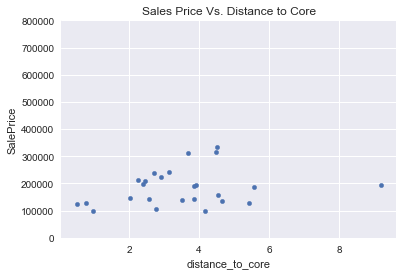

In [71]:
#bivariate analysis saleprice/distance_to_core
data = pd.concat([df_Neighborhood_avg['SalePrice'], df_Neighborhood_avg['distance_to_core']], axis=1)
data.plot.scatter(x='distance_to_core', y='SalePrice', ylim=(0,800000), title='Sales Price Vs. Distance to Core');

# Regression Model

In [72]:
#loading in the test data
df_test = pd.read_csv('test.csv')

#confirm test data is similar to train data
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [73]:
# Features with NaNs and the number of null for each features for test data
null_values = df_test.columns[df_test.isnull().any()]
null_features = df_test[null_values].isnull().sum().sort_values(ascending = False)
missing_data = pd.DataFrame({'No of Nulls' :null_features})
missing_data


,No of Nulls
PoolQC,1456
MiscFeature,1408
Alley,1352
Fence,1169
FireplaceQu,730
LotFrontage,227
GarageYrBlt,78
GarageCond,78
GarageQual,78
GarageFinish,78


In [74]:
#fill median values for each missing value
df_test['TotalBsmtSF'].fillna(df_test.groupby('Neighborhood')['TotalBsmtSF'].transform('median'), inplace=True)
df_test['GarageCars'].fillna(df_test.groupby('Neighborhood')['GarageCars'].transform('median'), inplace=True)
df_test['GarageArea'].fillna(df_test.groupby('Neighborhood')['GarageArea'].transform('median'), inplace=True)

In [75]:
#confirm missing value is filled
df_test['TotalBsmtSF'].isnull().sum()

0

In [76]:
#confirm missing value is filled
df_test['GarageCars'].isnull().sum()

0

In [77]:
#confirm missing value is filled
df_test['GarageArea'].isnull().sum()

0

In [78]:
#drop all columns except numerical regression variables and create a new dataframe for regression
#these numerical regression variables had the highest correlation to SalePrice

df_testreg = df_test[['OverallQual',
                      'GrLivArea',
                     'GarageCars',
                     'GarageArea',
                     'TotalBsmtSF',
                     '1stFlrSF']]

In [79]:
#assign numerical regression variables as X_testreg values from testreg dataframe
#these numerical regression variables had the highest correlation to SalePrice
X_testreg = df_testreg[['OverallQual',
                      'GrLivArea',
                     'GarageCars',
                     'GarageArea',
                     'TotalBsmtSF',
                     '1stFlrSF']]

In [80]:
#see if there's any null values
X_testreg.isna().sum()

OverallQual    0
GrLivArea      0
GarageCars     0
GarageArea     0
TotalBsmtSF    0
1stFlrSF       0
dtype: int64

In [81]:
#SciKitLearn - prepping data for Linear Model
df_trainreg = df_train[['OverallQual', 
                        'GrLivArea', 
                        'GarageCars', 
                        'GarageArea',
                        'TotalBsmtSF',
                      '1stFlrSF',
                        'SalePrice']]
    

In [82]:
#assign y and x values from train data set
Y_trainreg = df_trainreg['SalePrice']

X_trainreg = df_trainreg[['OverallQual',
                         'GrLivArea',
                         'GarageCars',
                         'GarageArea',
                         'TotalBsmtSF',
                         '1stFlrSF']]

In [83]:
#fitting the X and Y train variables into a linear regression
reg = LinearRegression().fit(X_trainreg, Y_trainreg)

In [84]:
#our coefficient of determination is 0.76 - our model explains 76% of the variability in housing prices
reg.score(X_trainreg,Y_trainreg)

0.761917951186283

In [85]:
#coefficients for OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF
reg.coef_

array([2.39970394e+04, 4.31228864e+01, 1.45151932e+04, 1.56639341e+01,
       2.43907676e+01, 1.11859135e+01])

In [86]:
#the y-intercept of our OLS regression model for saleprice - homes with no features has no value
reg.intercept_

-102650.90069028965

In [87]:
#pass the testreg data in the OLS regression model
predict_salesprice = reg.predict(X_testreg)

In [88]:
#the predicted sales price
predict_salesprice

array([113457.50326472, 165325.40168124, 157177.04111327, ...,
       151715.3795335 ,  92258.21232847, 240735.6592944 ])

In [89]:
#create a new saleprice column in the test dataframe
df_test['SalePrice'] = predict_salesprice
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,113457.503265
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,165325.401681
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,157177.041113
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179836.887801
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,227017.198181
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,175767.237967
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal,169893.536650
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,167762.678358
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,206820.810906
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal,100004.227401


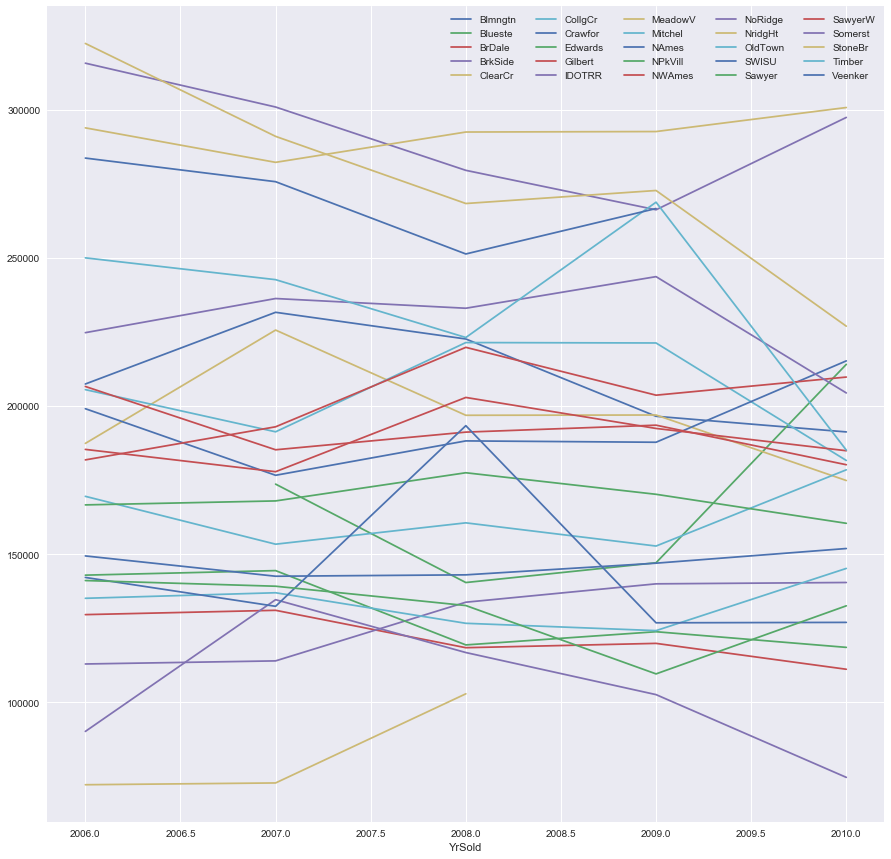

In [90]:
# plot predicted sales data by neighborhood and yearsold
fig, ax = plt.subplots(figsize=(15,15))

df_test.groupby(['YrSold', 'Neighborhood'])['SalePrice'].aggregate('mean').unstack().plot(ax=ax)
legend = plt.legend(ncol=5)
